In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import spectral.io.envi as envi
import spectral

import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b"
header = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b.hdr"

img = envi.open(header, file)

In [4]:
import sys

In [4]:
sys.executable

'C:\\Users\\Conor\\Anaconda3\\python.exe'

In [6]:
img.read_band(300)[:,:].shape

(3400, 6800)

In [9]:
L = img.read_band(350)#[1000:2600, 1000:2700]

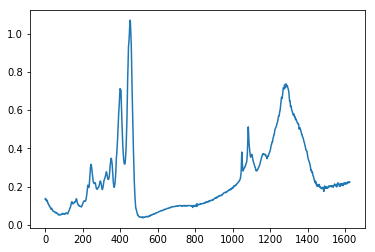

In [23]:
plt.plot(img.read_pixel(2100,900))

In [44]:
wavenumbers = {i: wn for i, wn in enumerate(img.metadata["wavelength"])}

In [45]:
wavenumbers

{0: '750.000000',
 1: '752.000000',
 2: '754.000000',
 3: '756.000000',
 4: '758.000000',
 5: '760.000000',
 6: '762.000000',
 7: '764.000000',
 8: '766.000000',
 9: '768.000000',
 10: '770.000000',
 11: '772.000000',
 12: '774.000000',
 13: '776.000000',
 14: '778.000000',
 15: '780.000000',
 16: '782.000000',
 17: '784.000000',
 18: '786.000000',
 19: '788.000000',
 20: '790.000000',
 21: '792.000000',
 22: '794.000000',
 23: '796.000000',
 24: '798.000000',
 25: '800.000000',
 26: '802.000000',
 27: '804.000000',
 28: '806.000000',
 29: '808.000000',
 30: '810.000000',
 31: '812.000000',
 32: '814.000000',
 33: '816.000000',
 34: '818.000000',
 35: '820.000000',
 36: '822.000000',
 37: '824.000000',
 38: '826.000000',
 39: '828.000000',
 40: '830.000000',
 41: '832.000000',
 42: '834.000000',
 43: '836.000000',
 44: '838.000000',
 45: '840.000000',
 46: '842.000000',
 47: '844.000000',
 48: '846.000000',
 49: '848.000000',
 50: '850.000000',
 51: '852.000000',
 52: '854.000000',
 53

In [4]:
amide_1 = img.read_band(451)[:,:3200]

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


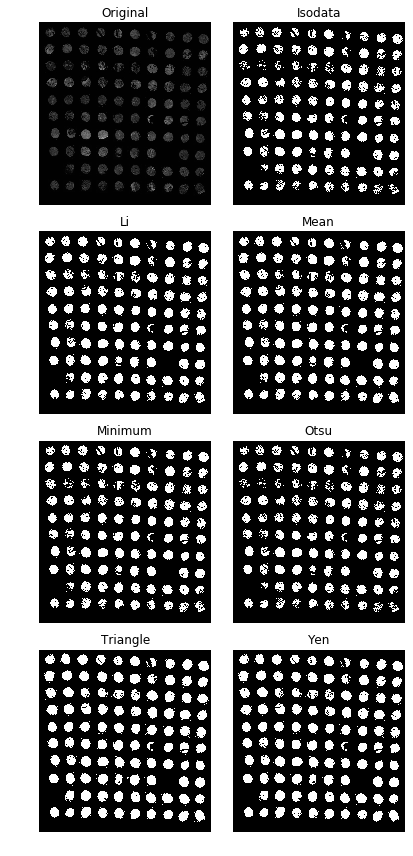

In [8]:
from skimage.filters import try_all_threshold

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(amide_1, figsize=(6, 12), verbose=True)
plt.show()

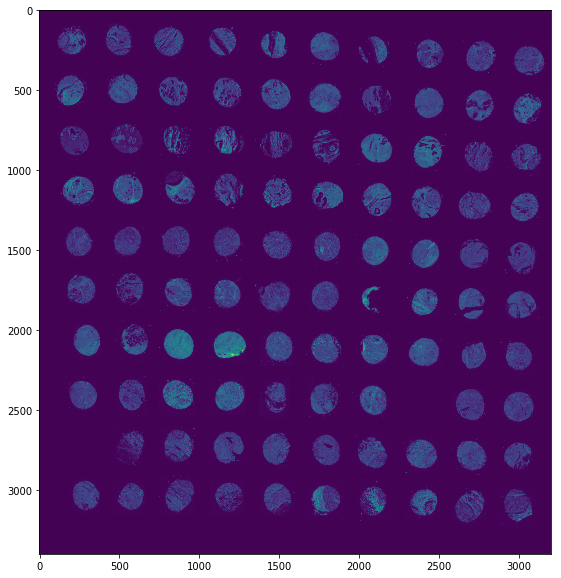

In [6]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(amide_1)

In [9]:
from skimage.filters import sobel

C:\Users\Conor\Anaconda3\lib\site-packages\skimage\color\colorlabel.py:162: UserWarning: Negative intensities in `image` are not supported
  warn("Negative intensities in `image` are not supported")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


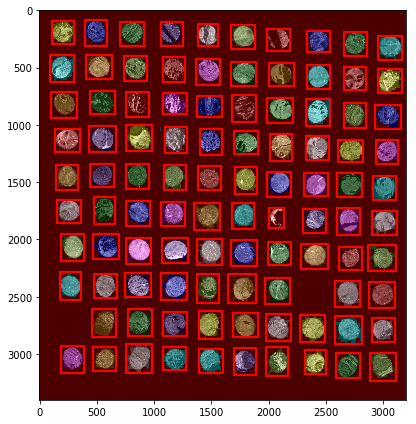

In [12]:
from skimage.filters import threshold_otsu, threshold_triangle, threshold_mean
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches

image = amide_1

# apply threshold
thresh = threshold_triangle(amide_1)
bw = closing(image > thresh, square(31))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc-minc, maxr-minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

#[plt.axvline(x) for x in np.linspace(100,3200,10)]        

plt.tight_layout()
plt.show()

In [13]:
regions = [region for region in regionprops(label_image) if region.area > 1000]

biggest = np.argmax([region.area for region in regions])
biggest_shape = regions[biggest].image.shape

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,  6.,  9., 24.,
        20., 10., 10.,  6.,  6.,  0.,  2.]),
 array([13691.  , 14924.15, 16157.3 , 17390.45, 18623.6 , 19856.75,
        21089.9 , 22323.05, 23556.2 , 24789.35, 26022.5 , 27255.65,
        28488.8 , 29721.95, 30955.1 , 32188.25, 33421.4 , 34654.55,
        35887.7 , 37120.85, 38354.  ]),
 <a list of 20 Patch objects>)

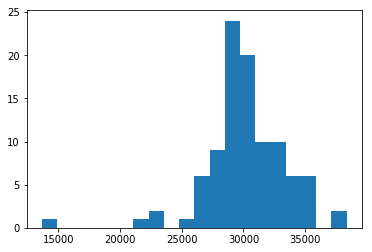

In [14]:
plt.hist([region.area for region in regionprops(label_image) if region.area > 1000], bins = 20)

In [15]:
regions = [image for image in regionprops(label_image) if image.area > 1000]

In [16]:
bbox = regions[75].bbox

In [17]:
bbox

(2304, 1374, 2554, 1564)

In [18]:
cropped = img.read_subregion([bbox[0], bbox[2]], [bbox[1], bbox[3]])

In [19]:
cropped.shape

(250, 190, 1626)

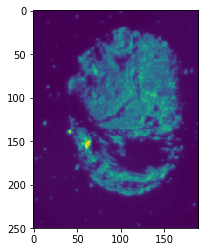

In [20]:
plt.imshow(cropped.mean(axis = 2))

In [21]:
regions[75].image.shape

(250, 190)

In [22]:
import imageio

In [23]:
tissue_colours = dict(zip(plt.cm.tab10.colors, ["blood", "coll", "epith", "fibro", "lymph", "myo", "necrosis"]))

In [24]:
tissue_colours

{(0.12156862745098039, 0.4666666666666667, 0.7058823529411765): 'blood',
 (1.0, 0.4980392156862745, 0.054901960784313725): 'coll',
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313): 'epith',
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392): 'fibro',
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353): 'lymph',
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354): 'myo',
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902): 'necrosis'}

In [110]:
np.argmax([region.area for region in regions])

75

In [25]:
import matplotlib

In [ ]:
from tqdm import tqdm

biggest = np.argmax([region.area for region in regions])
biggest_shape = regions[biggest].image.shape

for i, region in enumerate(tqdm([image for image in regionprops(label_image) if image.area > 1000])):
    
    bbox = region.bbox # Get bounding box of the segmented image
    
    cropped = img.read_subregion([bbox[0], bbox[2]], [bbox[1], bbox[3]]) # Get the cropped datacube
    
    temp_im = cropped.mean(axis = 2) # 

    for colour, name in tissue_colours.items():
        
        labels = imageio.imread(r"E:\Breast_Cancer_US_dataset\br1003-br2085b\supervised-class\class_{}.png".format(name))
        cropped_labels = labels[bbox[0]:bbox[2], bbox[1]: bbox[3]]

        label_img = np.zeros((temp_im.shape[0], temp_im.shape[1], 3), dtype = np.uint8)
        #label_img[cropped_labels > 1] = colour
        label_img[cropped_labels > 0] = colour

        #np.where(cropped_labels > 1, label_img, colour)
        
    #print("SAved")
    scaled = (255.0 / label_img.max() * (label_img - label_img.min())).astype(np.uint8)
    imageio.imsave(r"E:\Breast_Cancer_US_dataset\br1003-br2085b\supervised-class\lables\{}.jpg".format(region.label), scaled)
    
    #break
    
    #plt.imshow(temp_im)
    #plt.imshow(label_img, alpha = 0.5)
    #plt.show()
    #break
    
    #plt.savefig(r"E:\Breast_Cancer_US_dataset\br1003-br2085b\supervised-class\lables\{}.jpg".format(region.label)
    #           ,bbox_inches = "tight") 

In [41]:
A = np.zeros((100,100,3))

In [42]:
B = np.zeros((100,100,3))

In [43]:
B[30:40, 20:38] = (123,145,167)

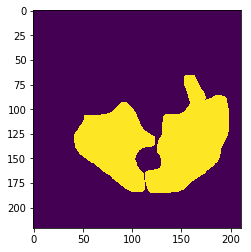

In [65]:
labels = imageio.imread(r"E:\Breast_Cancer_US_dataset\br1003-br2085b\supervised-class\class_{}.png".format("coll"))
bbox = regions[14].bbox
cropped = labels[bbox[0]:bbox[2],bbox[1]:bbox[3]]
plt.imshow(cropped)

In [67]:
A = np.zeros((cropped.shape[0], cropped.shape[1], 3))

In [70]:
A[cropped > 0] = (56,23,98)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


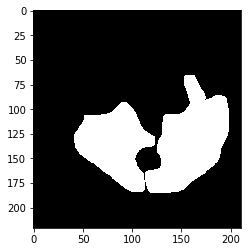

In [71]:
plt.imshow(A)

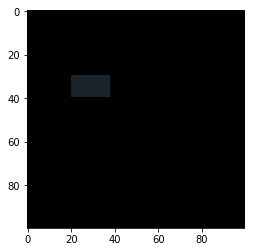

In [50]:
plt.imshow(np.where(B < 1, A, (0.1,0.145,0.167)))

In [158]:
[image for image in regionprops(label_image) if image.area > 1000][6]["area"]

43460

In [141]:
label_img.shape

(209, 203, 3)

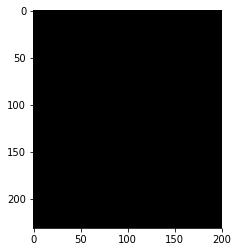

In [152]:
plt.imshow(label_img)

In [123]:
labels>1

Array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [93]:
label_img

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [84]:
labels = imageio.imread(r"E:\Breast_Cancer_US_dataset\br1003-br2085b\supervised-class\class_epith.png")

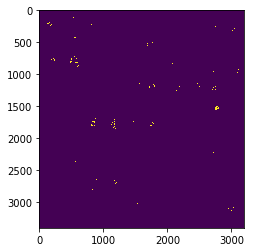

In [85]:
plt.imshow(labels[:,:3200])

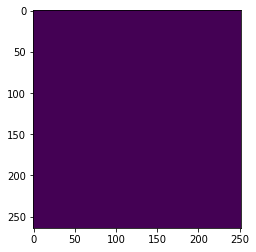

In [111]:
plt.imshow(labels[bbox[0]:bbox[2], bbox[1]: bbox[3]])

C:\Users\Conor\Anaconda3\lib\site-packages\spectral\graphics\graphics.py:602: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  rgb = source.read_bands(bands).astype(np.float)
C:\Users\Conor\Anaconda3\lib\site-packages\spectral\io\bsqfile.py:165: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  band = np.fromstring(vals.tostring(), dtype=self.dtype)


ImageView object:
  Display bands       :  (29, 19, 9)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.18523478507995605, 0.7837232351303101]
    G: [-0.2982504367828369, 0.7897186279296875]
    B: [-0.5072095394134521, 0.8729493618011475]

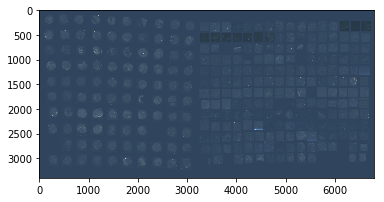

In [74]:
spectral.imshow(img, (29, 19, 9))